# Clustering Pharmaceutical Financial Measures
## Author : Dev

Importing all the needed modules : 

In [13]:
import pandas as pd
import numpy as np
import sklearn as sk
from sklearn import preprocessing
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

Importing the dataset :

In [2]:
df = pd.read_csv("/Users/devmarwah/Downloads/Pharmaceuticals.csv")

### Data Exploration 

Having a look at the head of our data 

In [3]:
df.head()

,Symbol,Name,Market_Cap,Beta,PE_Ratio,ROE,ROA,Asset_Turnover,Leverage,Rev_Growth,Net_Profit_Margin,Median_Recommendation,Location,Exchange
0,ABT,Abbott Laboratories,68.44,0.32,24.7,26.4,11.8,0.7,0.42,7.54,16.1,Moderate Buy,US,NYSE
1,AGN,"Allergan, Inc.",7.58,0.41,82.5,12.9,5.5,0.9,0.60,9.16,5.5,Moderate Buy,CANADA,NYSE
2,AHM,Amersham plc,6.30,0.46,20.7,14.9,7.8,0.9,0.27,7.05,11.2,Strong Buy,UK,NYSE
3,AZN,AstraZeneca PLC,67.63,0.52,21.5,27.4,15.4,0.9,0.00,15.00,18.0,Moderate Sell,UK,NYSE
4,AVE,Aventis,47.16,0.32,20.1,21.8,7.5,0.6,0.34,26.81,12.9,Moderate Buy,FRANCE,NYSE


In [4]:
df.shape

(21, 14)

Our dataset has 21 rows and 14 variables.

### Data Preparation 

Since Kmeans uses distances to cluster records, we will be using only the numeric variables. 

In [5]:
df.drop(['Symbol','Name','Median_Recommendation','Location','Exchange'],axis=1,inplace=True)

Checking shape of our data after dropping non-numeric variables.

In [6]:
df.shape

(21, 9)

Normalizing our dataset:

In [10]:
df_norm= preprocessing.StandardScaler().fit_transform(df)

In [11]:
# Giving normalized data column names
df.iloc[:,:]=df.norm

Having a look at normalized values :

In [12]:
df.head()

,Market_Cap,Beta,PE_Ratio,ROE,ROA,Asset_Turnover,Leverage,Rev_Growth,Net_Profit_Margin
0,0.188642,-0.821041,-0.047867,0.041080,0.247579,-5.247542e-16,-0.217336,-0.540801,0.063205
1,-0.875518,-0.461835,3.583430,-0.875950,-0.965557,9.453132e-01,0.018736,-0.390551,-1.592035
2,-0.897899,-0.262277,-0.299168,-0.740094,-0.522666,9.453132e-01,-0.414062,-0.586247,-0.701953
3,0.174479,-0.022807,-0.248907,0.109009,0.940799,9.453132e-01,-0.768169,0.151089,0.359900
4,-0.183447,-0.821041,-0.336863,-0.271389,-0.580435,-4.726566e-01,-0.322256,1.246425,-0.436490


Hence, our values are now normalized.

### Model Construction

We will be using kmeans method to cluster this data. Firstly, we need to look for optimum value of k.

**Using silhouette method**

In [15]:
from sklearn.cluster import KMeans
sh = []
for i in range(2,11):
    km=KMeans(n_clusters=i,n_init=10,random_state=40)
    km.fit(df)
    y=km.predict(df)
    s=silhouette_score(df,y)
    sh.append(s)

Plotting silhouette scores : 

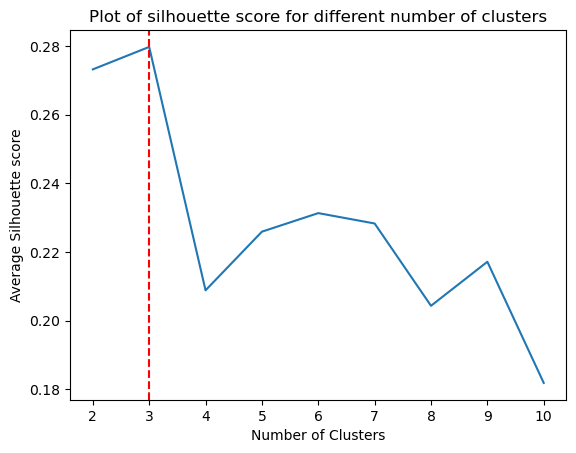

In [20]:
plt.plot(range(2,11),sh)
plt.xlabel("Number of Clusters")
plt.ylabel("Average Silhouette score")
plt.title("Plot of silhouette score for different number of clusters")
plt.axvline(x=3,color="r",linestyle="--")

**Hence, k=3 is the most optimum value**

Appying Kmeans on data for k=3

In [27]:
k=KMeans(n_clusters=3,n_init=10,random_state=10)
k.fit(df)
y=k.labels_

Visualising results : 

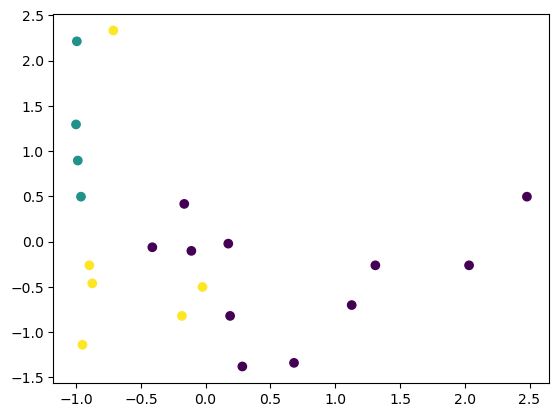

In [35]:
plt.scatter(df.iloc[:,0],df.iloc[:,1],c=y,cmap="viridis")

### Cluster Interpretation

Adding predictions as a column in the dataframe

In [39]:
df["Cluster"]=y
df.head()

,Market_Cap,Beta,PE_Ratio,ROE,ROA,Asset_Turnover,Leverage,Rev_Growth,Net_Profit_Margin,Cluster
0,0.188642,-0.821041,-0.047867,0.041080,0.247579,-5.247542e-16,-0.217336,-0.540801,0.063205,0
1,-0.875518,-0.461835,3.583430,-0.875950,-0.965557,9.453132e-01,0.018736,-0.390551,-1.592035,2
2,-0.897899,-0.262277,-0.299168,-0.740094,-0.522666,9.453132e-01,-0.414062,-0.586247,-0.701953,2
3,0.174479,-0.022807,-0.248907,0.109009,0.940799,9.453132e-01,-0.768169,0.151089,0.359900,0
4,-0.183447,-0.821041,-0.336863,-0.271389,-0.580435,-4.726566e-01,-0.322256,1.246425,-0.436490,2


Interpreting clusters on the basis of Market Cap and Net profit

**Cluster-1**

In [51]:
for i in range(0,df.shape[1]):
    if df.iloc[i,9]==0:
        display(df.iloc[i,[0,8]])

Market_Cap           0.188642
Net_Profit_Margin    0.063205
Name: 0, dtype: float64

Market_Cap           0.174479
Net_Profit_Margin    0.359900
Name: 3, dtype: float64

Market_Cap          -0.110533
Net_Profit_Margin    0.765902
Name: 6, dtype: float64

Market_Cap           0.283063
Net_Profit_Margin    1.203135
Name: 9, dtype: float64

**Cluster-2**

In [52]:
for i in range(0,df.shape[1]):
    if df.iloc[i,9]==1:
        display(df.iloc[i,[0,8]])

Market_Cap          -1.000888
Net_Profit_Margin   -1.279725
Name: 7, dtype: float64

Market_Cap          -0.994419
Net_Profit_Margin   -0.374028
Name: 8, dtype: float64

**Cluster-3**

In [53]:
for i in range(0,df.shape[1]):
    if df.iloc[i,9]==2:
        display(df.iloc[i,[0,8]])

Market_Cap          -0.875518
Net_Profit_Margin   -1.592035
Name: 1, dtype: float64

Market_Cap          -0.897899
Net_Profit_Margin   -0.701953
Name: 2, dtype: float64

Market_Cap          -0.183447
Net_Profit_Margin   -0.436490
Name: 4, dtype: float64

Market_Cap          -0.712554
Net_Profit_Margin   -2.044884
Name: 5, dtype: float64